<a href="https://colab.research.google.com/github/w-e-s-l-e-y/BairesDev---Machine-Learning-Practitioner/blob/main/Projeto_TranferLearning_catsxdogs_wesley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from shutil import copyfile

In [2]:
# Download do arquivo (se necessário, ajuste o comando `wget` no seu terminal Linux)
# Substitua este link por um atualizado se não funcionar

# Verificando se o arquivo já existe para evitar downloads repetidos
if not os.path.exists('/tmp/cats-and-dogs.zip'):
    !wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"
    print("Download concluído!")
else:
    print("Arquivo já existe, pulando o download.")


# Caminho para o arquivo ZIP baixado
local_zip = '/tmp/cats-and-dogs.zip'
extract_dir = '/tmp'

if not os.path.exists(f"{extract_dir}/PetImages"):
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Arquivo extraído com sucesso!")
else:
    print("Os arquivos já foram extraídos, pulando esta etapa.")


--2025-01-10 10:28:09--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.72.156.221, 2600:1408:10:3b2::317f, 2600:1408:10:38c::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.72.156.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  69.9MB/s    in 11s     

2025-01-10 10:28:21 (73.9 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]

Download concluído!
Arquivo extraído com sucesso!


In [3]:
# Diretórios das imagens
cat_dir = '/tmp/PetImages/Cat/'
dog_dir = '/tmp/PetImages/Dog/'

# Contagem das imagens
print(f"Número de imagens de gatos: {len(os.listdir(cat_dir))}")
print(f"Número de imagens de cachorros: {len(os.listdir(dog_dir))}")

# Saída esperada (se os dados estiverem completos e intactos):
# Número de imagens de gatos: 12501
# Número de imagens de cachorros: 12501

Número de imagens de gatos: 12501
Número de imagens de cachorros: 12501


In [4]:
try:
    # Criando as pastas principais
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')

    # Criando as subpastas para gatos e cachorros
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass  # Ignora o erro caso as pastas já existam


In [5]:
# Função para dividir os dados em treinamento e teste
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []

    # Listando os arquivos na pasta de origem
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:  # Verifica se o arquivo não está vazio
            files.append(filename)
        else:
            print(f"{filename} is zero length, so ignoring.")  # Ignora arquivos vazios

    # Determinando o tamanho dos conjuntos de treinamento e teste
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = len(files) - training_length

    # Embaralhando os arquivos
    shuffled_set = random.sample(files, len(files))

    # Dividindo os arquivos em conjuntos de treinamento e teste
    training_set = shuffled_set[:training_length]
    testing_set = shuffled_set[-testing_length:]

    # Copiando os arquivos para os diretórios de treinamento e teste
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

# Diretórios das imagens de gatos e cachorros
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

# Proporção de divisão (90% para treinamento, 10% para teste)
split_size = 0.9

# Dividindo os dados
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Saída esperada:
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [6]:
# Contando os arquivos em cada pasta
print(f"Número de imagens de gatos no treinamento: {len(os.listdir('/tmp/cats-v-dogs/training/cats/'))}")
print(f"Número de imagens de cachorros no treinamento: {len(os.listdir('/tmp/cats-v-dogs/training/dogs/'))}")
print(f"Número de imagens de gatos no teste: {len(os.listdir('/tmp/cats-v-dogs/testing/cats/'))}")
print(f"Número de imagens de cachorros no teste: {len(os.listdir('/tmp/cats-v-dogs/testing/dogs/'))}")

# Saída esperada:
# Número de imagens de gatos no treinamento: 11250
# Número de imagens de cachorros no treinamento: 11250
# Número de imagens de gatos no teste: 1250
# Número de imagens de cachorros no teste: 1250

Número de imagens de gatos no treinamento: 11250
Número de imagens de cachorros no treinamento: 11250
Número de imagens de gatos no teste: 1250
Número de imagens de cachorros no teste: 1250


In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

# Carregando o modelo base pré-treinado
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(150, 150, 3),
    include_top=False,  # Remove a última camada densa do modelo original
    weights='imagenet'  # Usa pesos pré-treinados no ImageNet
)

# Congelando os pesos do modelo base
base_model.trainable = False

# Definindo o modelo completo com Transfer Learning
model = tf.keras.models.Sequential([
    base_model,  # Modelo base
    tf.keras.layers.GlobalAveragePooling2D(),  # Reduz as características extraídas
    tf.keras.layers.Dense(512, activation='relu'),  # Camada densa
    tf.keras.layers.Dropout(0.3),  # Evita overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # Saída para classificação binária
])

# Compilando o modelo
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo
model.summary()


<ipython-input-7-0227c36dafb4>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,914,369 (11.12 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Diretório de treinamento
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normaliza os valores dos pixels para [0, 1]

# Gerador de dados de treinamento
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=250,              # Define o tamanho do lote
    class_mode='binary',         # Para classificação binária
    target_size=(150, 150)       # Redimensiona as imagens para 150x150
)

# Diretório de validação
VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normaliza os valores dos pixels

# Gerador de dados de validação
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=250,
    class_mode='binary',
    target_size=(150, 150)
)

# Saída esperada:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

# Diretório de treinamento
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normaliza os valores dos pixels para [0, 1]

# Gerador de dados de treinamento
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=250,              # Define o tamanho do lote
    class_mode='binary',         # Para classificação binária
    target_size=(150, 150)       # Redimensiona as imagens para 150x150
)

# Diretório de validação
VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normaliza os valores dos pixels

# Gerador de dados de validação
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=250,
    class_mode='binary',
    target_size=(150, 150)
)

# Saída esperada:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.
Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [9]:
# Note que o treinamento pode levar algum tempo, dependendo do hardware disponível.

# Treinando o modelo
history = model.fit(
    train_generator,                     # Gerador de dados de treinamento
    epochs=15,                           # Número de épocas
    steps_per_epoch=90,                  # Número de passos por época (tamanho do conjunto de treinamento / batch_size)
    validation_data=validation_generator, # Gerador de dados de validação
    validation_steps=6                   # Número de passos por validação (tamanho do conjunto de validação / batch_size)
)

# Avaliação no conjunto de teste
print("\n### Avaliação no conjunto de teste ###")
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Loss no conjunto de teste: {test_loss}")
print(f"Acurácia no conjunto de teste: {test_acc}")

# Relatório detalhado
from sklearn.metrics import classification_report
y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convertendo para classes binárias
print("\n### Relatório de Classificação ###")
print(classification_report(validation_generator.classes, y_pred_classes))



Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 9/90 ━━━━━━━━━━━━━━━━━━━━ 8:51 7s/step - accuracy: 0.6969 - loss: 1.2765

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


90/90 ━━━━━━━━━━━━━━━━━━━━ 652s 7s/step - accuracy: 0.8914 - loss: 0.4115 - val_accuracy: 0.9653 - val_loss: 0.0868
Epoch 2/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 303ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9610 - val_loss: 0.1050
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 669s 7s/step - accuracy: 0.9610 - loss: 0.0943 - val_accuracy: 0.9207 - val_loss: 0.1926
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 299ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9119 - val_loss: 0.2369
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 716s 7s/step - accuracy: 0.9618 - loss: 0.0931 - val_accuracy: 0.9387 - val_loss: 0.1660
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 281ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9329 - val_loss: 0.1533
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 651s 7s/step - accuracy: 0.9727 - loss: 0.0699 - val_accuracy: 0.9613 - val_loss: 0.0916
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 333ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9630 - val_loss: 0.1176
Epoch 9/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 662s 7s/step - accuracy: 0.9791 - loss: 0.05

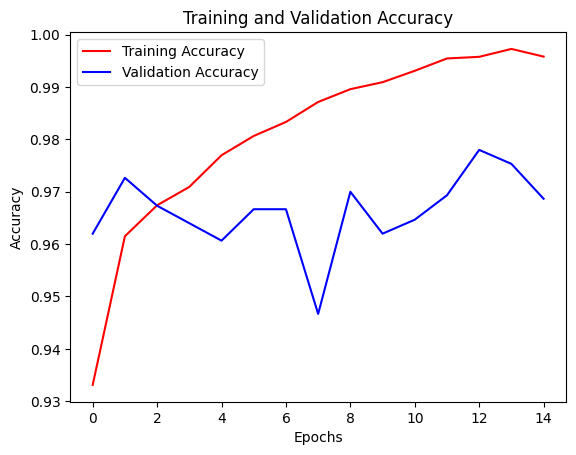

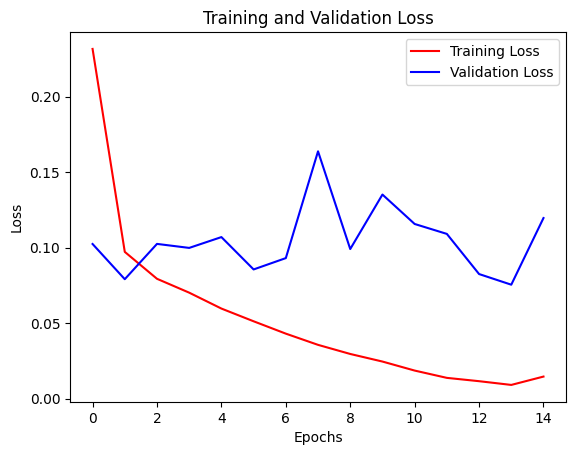

In [ ]:
# Ativar inline plots no Jupyter Notebook
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Recuperar os resultados de acurácia e perda do histórico de treinamento
acc = history.history['accuracy']  # Acurácia de treinamento
val_acc = history.history['val_accuracy']  # Acurácia de validação
loss = history.history['loss']  # Perda de treinamento
val_loss = history.history['val_loss']  # Perda de validação

# Número de épocas
epochs = range(len(acc))

# Gráfico da acurácia de treinamento e validação por época
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Gráfico da perda de treinamento e validação por época
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

